<a href="https://colab.research.google.com/github/iishutov/CV-Project/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, regularizers
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [66]:
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'

batch_size = 32
rescale = 1./255
img_height = img_width = 64

In [67]:
# Training dataset preprocessing
train_datagen = ImageDataGenerator(
    rescale=rescale,
    # rotation_range=5,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    horizontal_flip=True,
    # fill_mode='nearest',
    validation_split=0.0
)

train_dataset = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42,
)

Found 574 images belonging to 2 classes.


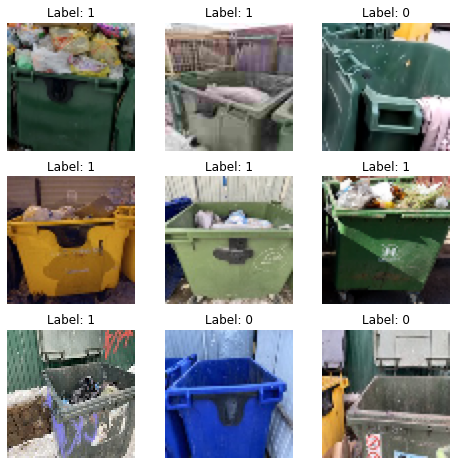

In [68]:
# Show the resulted training dataset after augmentation.
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i in range(3):
    for j in range(3):
        image, label = train_dataset.next()
        axs[i,j].imshow(image[0])
        axs[i,j].set_title(f'Label: {(int)(label[0])}')
        axs[i,j].axis('off')
plt.show()

In [57]:
# ImageDataGenerator does not increase the size of the dataset.
train_dataset.n

574

In [69]:
# Testing dataset preprocessing (normalization).
test_datagen = ImageDataGenerator(rescale=rescale)

test_dataset = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 101 images belonging to 2 classes.


In [73]:
# Building the convolutional base.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Adding Dense Layers.
model.add(layers.Flatten())
model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_12 (Flatten)        (None, 9216)            

Epoch 1/20
18/18 [==============================] - 9s 427ms/step - loss: 2.2082 - accuracy: 0.5610 - val_loss: 1.6542 - val_accuracy: 0.5644
Epoch 2/20
18/18 [==============================] - 5s 290ms/step - loss: 1.4285 - accuracy: 0.5889 - val_loss: 1.2503 - val_accuracy: 0.5743
Epoch 3/20
18/18 [==============================] - 5s 284ms/step - loss: 1.1135 - accuracy: 0.6202 - val_loss: 0.9776 - val_accuracy: 0.5941
Epoch 4/20
18/18 [==============================] - 7s 403ms/step - loss: 0.9339 - accuracy: 0.6934 - val_loss: 0.9069 - val_accuracy: 0.6733
Epoch 5/20
18/18 [==============================] - 5s 280ms/step - loss: 0.7879 - accuracy: 0.7526 - val_loss: 0.7163 - val_accuracy: 0.8020
Epoch 6/20
18/18 [==============================] - 5s 277ms/step - loss: 0.7405 - accuracy: 0.7456 - val_loss: 0.6853 - val_accuracy: 0.7822
Epoch 7/20
18/18 [==============================] - 6s 341ms/step - loss: 0.7069 - accuracy: 0.7770 - val_loss: 0.7103 - val_accuracy: 0.7624
Epoch 

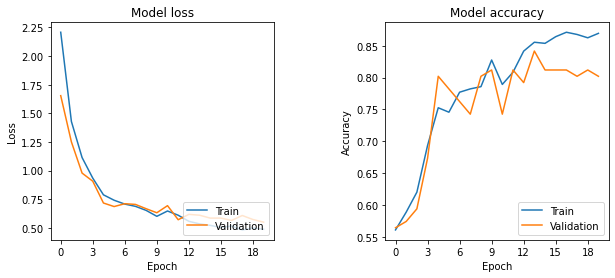

In [74]:
# Training the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
    )

history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)
#

# Visualizing loss and accuracy.
fig, (axs_loss, axs_acc) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axs_loss.set_title('Model loss')
axs_loss.set_ylabel('Loss')
axs_loss.set_xlabel('Epoch')
axs_loss.plot(history.history['loss'], label='Train')
axs_loss.plot(history.history['val_loss'], label='Validation')
axs_loss.legend(loc='lower right')
axs_loss.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

axs_acc.set_title('Model accuracy')
axs_acc.set_ylabel('Accuracy')
axs_acc.set_xlabel('Epoch')
axs_acc.plot(history.history['accuracy'], label='Train')
axs_acc.plot(history.history['val_accuracy'], label='Validation')
axs_acc.legend(loc='lower right')
axs_acc.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

fig.subplots_adjust(wspace=0.5)
plt.show()

4/4 [==============================] - 1s 79ms/step


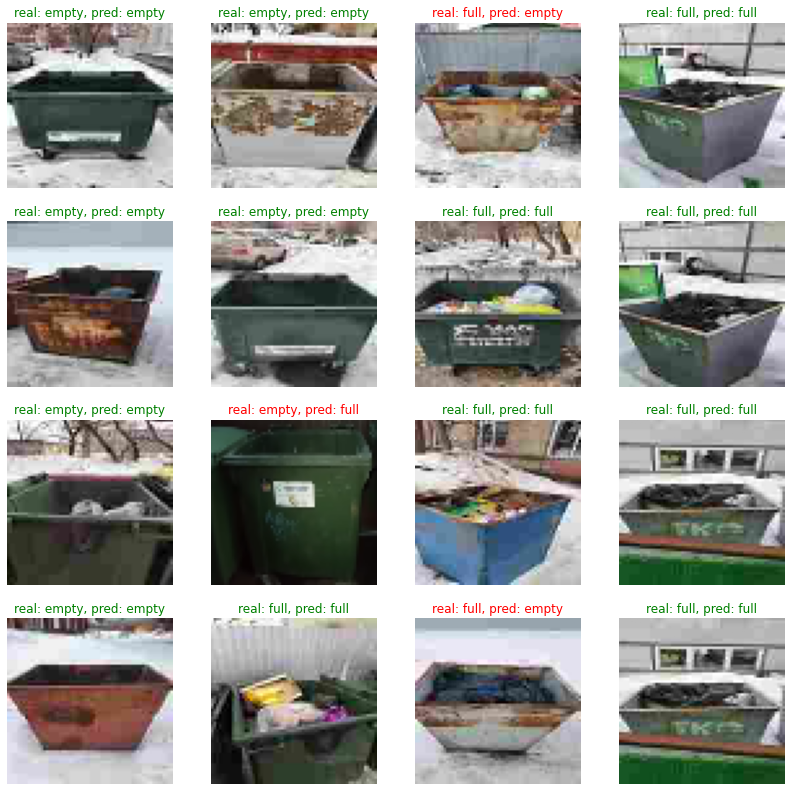

In [75]:
# Result.
predictions = model.predict(test_dataset)

idx = 0
rng = np.random.default_rng()
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,14))

for i in range(4):
  for j in range(4):
    image, label = test_dataset.next()
    _batch_size = label.shape[0]
    
    local_idx = (int)(_batch_size * rng.uniform())
    global_idx = (idx + local_idx) % len(predictions)

    real_class = 'full' if np.round(label[local_idx]) else 'empty'
    predicted_class = 'full' if np.round(predictions[global_idx][0]) else 'empty'

    axs[i,j].set_title(f'real: {real_class}, pred: {predicted_class}')\
      .set_color('green' if real_class == predicted_class else 'red')
    axs[i,j].imshow(image[local_idx])
    axs[i,j].axis('off')

    idx += _batch_size

plt.show()
